<a href="https://colab.research.google.com/github/radhikasethi2011/Patient_Survival_Hospital/blob/master/Patient_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [370]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [371]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [372]:
df['Patient_Smoker'] = df['Patient_Smoker'].map({'YES': 1, 'NO': 0})
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,1.0,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,1.0,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,1.0,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,0.0,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,NaN,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [373]:
df['Patient_Rural_Urban'] = df['Patient_Rural_Urban'].map({'URBAN': 1, 'RURAL': 0})
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,1.0,1,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,1.0,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,1.0,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,0.0,1,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,NaN,0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [374]:
df['Patient_mental_condition'] = df['Patient_mental_condition'].map({'Stable': 1, 'Unstable': 0})
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,1.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,NaN,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [375]:
df = df.drop(columns='Treated_with_drugs',axis=1)
df.head(100)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,56,18.479385,1.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,36,22.945566,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,48,27.510027,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,5,19.130976,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,128,1.348400,NaN,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17418,16,1732,47,19.910977,0.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
96,10297,18,1635,53,24.834546,1.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
97,9311,13,7538,49,26.641499,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
98,19080,36,12410,32,22.235589,1.0,1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0


In [376]:
df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                 13
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [377]:
df.describe()


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23084.000000,23097.000000,23097.0,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.426183,0.301468,1.0,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.494532,0.458905,0.0,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Patient_Age                23097 non-null  int64  
 4   Patient_Body_Mass_Index    23097 non-null  float64
 5   Patient_Smoker             23084 non-null  float64
 6   Patient_Rural_Urban        23097 non-null  int64  
 7   Patient_mental_condition   23097 non-null  int64  
 8   A                          21862 non-null  float64
 9   B                          21862 non-null  float64
 10  C                          21862 non-null  float64
 11  D                          21862 non-null  float64
 12  E                          21862 non-null  float64
 13  F                          21862 non-null  flo

In [379]:
list1 = ['A','B','C','D','E','F','Z']
for cols in list1:
  df[cols].fillna(round(df[cols].mean()), inplace=True)
df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                 13
Patient_Rural_Urban             0
Patient_mental_condition        0
A                               0
B                               0
C                               0
D                               0
E                               0
F                               0
Z                               0
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [380]:
df['Number_of_prev_cond'].fillna(round(df['Number_of_prev_cond'].mean()), inplace=True)
df.isnull().sum()

ID_Patient_Care_Situation     0
Diagnosed_Condition           0
Patient_ID                    0
Patient_Age                   0
Patient_Body_Mass_Index       0
Patient_Smoker               13
Patient_Rural_Urban           0
Patient_mental_condition      0
A                             0
B                             0
C                             0
D                             0
E                             0
F                             0
Z                             0
Number_of_prev_cond           0
Survived_1_year               0
dtype: int64

In [381]:

df.head()
df = df[df['Patient_Smoker'].notna()]
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,56,18.479385,1.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,36,22.945566,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,48,27.510027,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,5,19.130976,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,47,26.155120,1.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [382]:
df.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

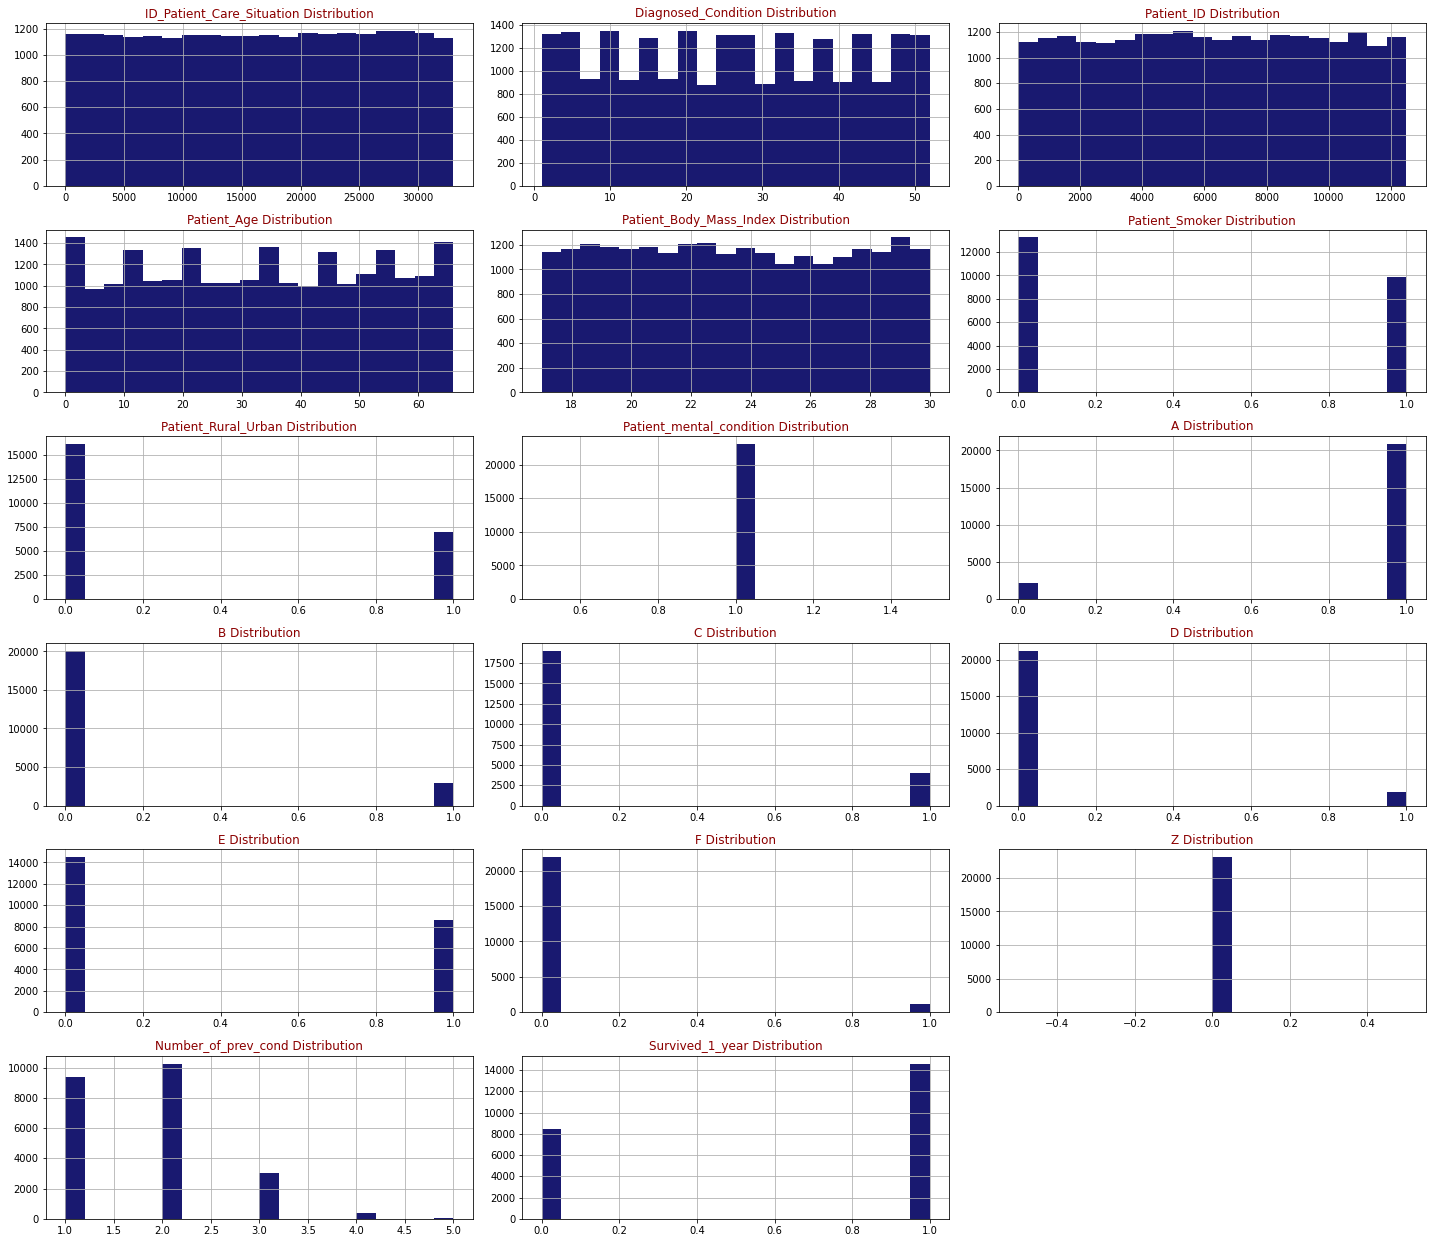

In [383]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,7,3)
#23097 rows × 21 columns

In [384]:
df.Survived_1_year.value_counts()


1    14590
0     8494
Name: Survived_1_year, dtype: int64

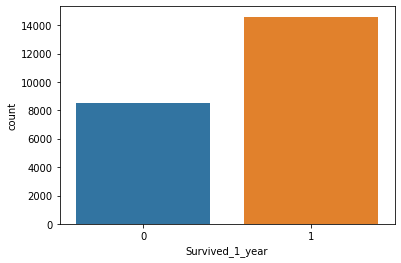

In [385]:
sn.countplot(x=df.Survived_1_year,data=df)

In [386]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,56,18.479385,1.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,36,22.945566,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,48,27.510027,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,5,19.130976,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,47,26.155120,1.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [387]:
import sklearn
X = df.drop(columns='Survived_1_year',axis=1)
X

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,22374,8,3333,56,18.479385,1.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,18164,5,5740,36,22.945566,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6283,23,10446,48,27.510027,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5339,51,12011,5,19.130976,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,10808,45,7977,47,26.155120,1.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,14,18.643448,0.0,0,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0
23093,15503,41,2769,55,23.684585,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23094,2167,24,7671,63,27.500039,1.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23095,31646,11,5764,25,23.719125,1.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [388]:
y=df['Survived_1_year']
y

0        0
1        1
2        0
3        1
5        0
        ..
23092    0
23093    1
23094    0
23095    1
23096    0
Name: Survived_1_year, Length: 23084, dtype: int64

In [389]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [390]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [391]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.6703725093849263

In [392]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [393]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [394]:
test_new['Patient_Smoker'] = test_new['Patient_Smoker'].map({'YES': 1, 'NO': 0})
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,0,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,0,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,0,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,0,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,0,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [395]:
test_new['Patient_Rural_Urban'] = test_new['Patient_Rural_Urban'].map({'URBAN': 1, 'RURAL': 0})
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,0,0,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,0,1,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,0,0,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,0,1,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,0,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [396]:
test_new['Patient_mental_condition'] = test_new['Patient_mental_condition'].map({'Stable': 1, 'Unstable': 0})
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [397]:
test_new = test_new.drop(columns='Treated_with_drugs',axis=1)
test_new.head(100)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,16,29.443894,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,24,26.836321,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,63,25.523280,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,42,27.171155,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,50,25.556192,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32185,11,897,1,28.024565,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
96,22878,26,7431,22,24.244689,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
97,12629,8,2539,54,19.743251,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98,3326,19,9951,53,23.220740,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [398]:
test_new.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [399]:
y_testpred = clf.predict(test_new)


In [400]:
y_testpred

array([1, 1, 1, ..., 0, 0, 1])

In [401]:
#to save the model 
res=pd.DataFrame(y_testpred)
res.index = test_new.index
res.columns=["y_testpred"]


In [402]:
#to download the csv file 
from google.colab import files 
res.to_csv('prediction_results.csv')
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>